# HNG13 Internship Data Analytics Track – Stage 1 Task: Feature Engineering & Exploration.

# MovieLens Data Analysis
This notebook performs feature engineering and exploratory data analysis on the MovieLens dataset, which contains user ratings for various movies. The goal is to create new features that can help in understanding user preferences and movie characteristics.

# Table of Contents

- [Introduction](#Introduction)

- [Step 1: Data Preparation](#Step-1:-Data-Preparation)

- [Step 2: Feature Engineering](#Step-2:-Feature-Engineering)

- [Step 3: Exploratory Data Analysis](#Step-3:-Exploratory-Data-Analysis)

- [EDA Summary](#EDA-Summary)

# Introduction
In this notebook, I will perform feature engineering and exploratory data analysis (EDA) on the MovieLens dataset. The dataset contains user ratings for various movies along with movie metadata. The goal is to create new features that can enhance the analysis and provide insights into user behavior and movie preferences.

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Step 1: Data Preparation
In this section, I will load the datasets, handle missing values, and merge them for analysis.

In [2]:
# Load datasets
movies_df = pd.read_csv(r"C:\Users\Owner\Downloads\ml-latest-small\ml-latest-small\movies.csv")
ratings_df = pd.read_csv(r"C:\Users\Owner\Downloads\ml-latest-small\ml-latest-small\ratings.csv")
tags_df = pd.read_csv(r"C:\Users\Owner\Downloads\ml-latest-small\ml-latest-small\tags.csv")
links_df = pd.read_csv(r"C:\Users\Owner\Downloads\ml-latest-small\ml-latest-small\links.csv")

print("Datasets loaded successfully.") 

Datasets loaded successfully.


In [3]:
# Observe the first few rows of each dataset
print("Movies Dataset:")
print(movies_df.head())
print("\nRatings Dataset:")
print(ratings_df.head())
print("\nTags Dataset:")
print(tags_df.head())
print("\nLinks Dataset:")
print(links_df.head())

Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Tags Dataset:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quota

In [4]:
# Check the structure and summary statistics of each dataset
print("\nMovies Dataset Info:") 
print(movies_df.info())
print(movies_df.describe())

print("\nRatings Dataset Info:")
print(ratings_df.info())
print(ratings_df.describe())

print("\nTags Dataset Info:")
print(tags_df.info())
print(tags_df.describe())

print("\nLinks Dataset Info:")
print(links_df.info())
print(links_df.describe())  


Movies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
       

In [5]:
# Merge datasets for comprehensive analysis
merged_df = ratings_df.merge(movies_df, on='movieId', how='left')
print("\nMerged Dataset Info:")
print(merged_df.info())
print(merged_df.describe(include='all'))


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB
None
               userId        movieId         rating     timestamp  \
count   100836.000000  100836.000000  100836.000000  1.008360e+05   
unique            NaN            NaN            NaN           NaN   
top               NaN            NaN            NaN           NaN   
freq              NaN            NaN            NaN           NaN   
mean       326.127564   19435.295718       3.501557  1.205946e+09   
std        182.618491   35530.987199       1.042529  2.1626

In [6]:
# Check for duplicates
duplicates = merged_df.duplicated().sum()
print(f"\nNumber of duplicate rows in merged dataset: {duplicates}")


Number of duplicate rows in merged dataset: 0


In [7]:
# Check for missing values
print("\nMissing Values in Merged Dataset:")
print(merged_df.isnull().sum())


Missing Values in Merged Dataset:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


In [8]:
#Convert 'timestamp' to datetime
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')
print("\nConverted 'timestamp' to datetime.")
# Display the first few rows of the updated merged dataset
print(merged_df.head())


Converted 'timestamp' to datetime.
   userId  movieId  rating           timestamp                        title  \
0       1        1     4.0 2000-07-30 18:45:03             Toy Story (1995)   
1       1        3     4.0 2000-07-30 18:20:47      Grumpier Old Men (1995)   
2       1        6     4.0 2000-07-30 18:37:04                  Heat (1995)   
3       1       47     5.0 2000-07-30 19:03:35  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0 2000-07-30 18:48:51   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


## Step 2: Feature Engineering
In this section, I will create new features from the existing data to enhance the dataset for better analysis.

1. Extracting Release Year from Movie Title
I will use regular expressions to extract the release year from the movie title and create a new feature called 'release_year'. 
This feature will help analyze trends over time.

In [9]:
# 1. Extract release year from title
merged_df['release_year'] = merged_df['title'].str.extract(r'\((\d{4})\)')
print("\nExtracted 'release_year' from 'title'.")


Extracted 'release_year' from 'title'.


Next, I will count the number of genres for each movie and create a new feature called 'genre_count'.
This feature wil help see if the number of genres influences user ratings.

In [10]:
# 2. Count the number of genres per movie
merged_df['genre_count'] = merged_df['genres'].apply(lambda x: len(x.split('|')) if pd.notnull(x) else 0)
print("\nCalculated 'genre_count' for each movie.")


Calculated 'genre_count' for each movie.


I will also create a feature called 'primary_genre' to identify the main genre of each movie. This will help in analyzing genre-specific trends.

In [11]:
# 3. Primary genre of each movie
merged_df['primary_genre'] = merged_df['genres'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else None)
print("\nExtracted 'primary_genre' for each movie.")
# Display the first few rows of the updated merged dataset
print(merged_df.head())


Extracted 'primary_genre' for each movie.
   userId  movieId  rating           timestamp                        title  \
0       1        1     4.0 2000-07-30 18:45:03             Toy Story (1995)   
1       1        3     4.0 2000-07-30 18:20:47      Grumpier Old Men (1995)   
2       1        6     4.0 2000-07-30 18:37:04                  Heat (1995)   
3       1       47     5.0 2000-07-30 19:03:35  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0 2000-07-30 18:48:51   Usual Suspects, The (1995)   

                                        genres release_year  genre_count  \
0  Adventure|Animation|Children|Comedy|Fantasy         1995            5   
1                               Comedy|Romance         1995            2   
2                        Action|Crime|Thriller         1995            3   
3                             Mystery|Thriller         1995            2   
4                       Crime|Mystery|Thriller         1995            3   

  primary_genre  
0     A

Next, I will add a feature that shows the average rating per movie. This will help in understanding how different movies are rated on average by users.

In [12]:
# 4. Average rating per movie and add as a new feature
merged_df['movie_avg_rating'] = merged_df.groupby('movieId')['rating'].transform('mean').round(2)
print("\nCalculated 'movie_avg_rating' for each movie.")
# Display the first few rows of the updated merged dataset  
print(merged_df.head())



Calculated 'movie_avg_rating' for each movie.
   userId  movieId  rating           timestamp                        title  \
0       1        1     4.0 2000-07-30 18:45:03             Toy Story (1995)   
1       1        3     4.0 2000-07-30 18:20:47      Grumpier Old Men (1995)   
2       1        6     4.0 2000-07-30 18:37:04                  Heat (1995)   
3       1       47     5.0 2000-07-30 19:03:35  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0 2000-07-30 18:48:51   Usual Suspects, The (1995)   

                                        genres release_year  genre_count  \
0  Adventure|Animation|Children|Comedy|Fantasy         1995            5   
1                               Comedy|Romance         1995            2   
2                        Action|Crime|Thriller         1995            3   
3                             Mystery|Thriller         1995            2   
4                       Crime|Mystery|Thriller         1995            3   

  primary_genre  movi

Also, I will create a feature that counts the number of ratings each movie has received. This will help in identifying popular movies.

In [13]:
# 5. Count the number of ratings given to each movie
merged_df['movie_rating_count'] = merged_df.groupby('movieId')['rating'].transform('count')
print("\nCalculated 'movie_rating_count' for each movie.") 
# Display the first few rows of the updated merged dataset  
print(merged_df.head())


Calculated 'movie_rating_count' for each movie.
   userId  movieId  rating           timestamp                        title  \
0       1        1     4.0 2000-07-30 18:45:03             Toy Story (1995)   
1       1        3     4.0 2000-07-30 18:20:47      Grumpier Old Men (1995)   
2       1        6     4.0 2000-07-30 18:37:04                  Heat (1995)   
3       1       47     5.0 2000-07-30 19:03:35  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0 2000-07-30 18:48:51   Usual Suspects, The (1995)   

                                        genres release_year  genre_count  \
0  Adventure|Animation|Children|Comedy|Fantasy         1995            5   
1                               Comedy|Romance         1995            2   
2                        Action|Crime|Thriller         1995            3   
3                             Mystery|Thriller         1995            2   
4                       Crime|Mystery|Thriller         1995            3   

  primary_genre  mo

Finally, I will average rating given by each user to create a feature called 'user_avg_rating'. This will help in understanding user preferences.

In [14]:
# 6. Average rating given by each user
merged_df['user_avg_rating'] = merged_df.groupby('userId')['rating'].transform('mean').round(2)
print("\nCalculated 'user_avg_rating' for each user.")
# Display the first few rows of the updated merged dataset
print(merged_df.head())


Calculated 'user_avg_rating' for each user.
   userId  movieId  rating           timestamp                        title  \
0       1        1     4.0 2000-07-30 18:45:03             Toy Story (1995)   
1       1        3     4.0 2000-07-30 18:20:47      Grumpier Old Men (1995)   
2       1        6     4.0 2000-07-30 18:37:04                  Heat (1995)   
3       1       47     5.0 2000-07-30 19:03:35  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0 2000-07-30 18:48:51   Usual Suspects, The (1995)   

                                        genres release_year  genre_count  \
0  Adventure|Animation|Children|Comedy|Fantasy         1995            5   
1                               Comedy|Romance         1995            2   
2                        Action|Crime|Thriller         1995            3   
3                             Mystery|Thriller         1995            2   
4                       Crime|Mystery|Thriller         1995            3   

  primary_genre  movie_

## Step 3: Exploratory Data Analysis
In this section, I will perform exploratory data analysis (EDA) to understand the distribution of ratings, popular genres, user behavior etc.

In [15]:
# set plotting style
sns.set_theme(style = 'darkgrid')
base_color = sns.color_palette()[0]

In [16]:
# Define a function for countplots
def count_plot(arg, x_label, y_label, title):
    '''Creates a count plot and set axis labels and title'''
    sns.countplot(data=merged_df, x=arg, color=base_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

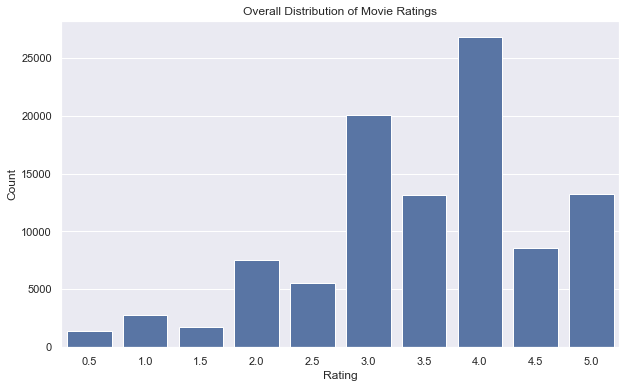

In [17]:
# 1. What is the overall distribution of movie ratings?
plt.figure(figsize=(10,6))
count_plot('rating', 'Rating', 'Count', 'Overall Distribution of Movie Ratings')

The chart above shows that the majority of movies have ratings between 3 and 4, with a peak at 4. This indicates that users generally rate movies positively, with fewer ratings at the extreme ends (1 and 5).

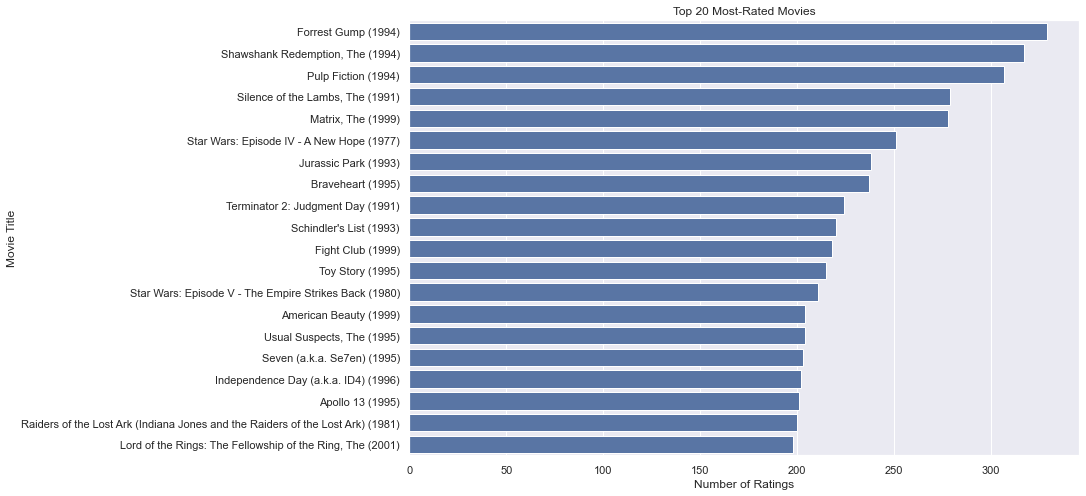

In [18]:
# 2. What are the top 20 most rated movies?
# Create a simple df of unique movies
movie_stats = merged_df.drop_duplicates('movieId')[['title', 'movie_rating_count', 'movie_avg_rating']]
top_20_rated = movie_stats.sort_values('movie_rating_count', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='movie_rating_count', y='title', data=top_20_rated, orient='h', color=base_color)
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 20 Most-Rated Movies')
plt.show()

The above chart shows that Forest Gump is the most rated movie in the dataset, followed by The Shawshank Redemption and The Dark Knight. These movies have received a significant number of ratings, indicating their popularity among users.

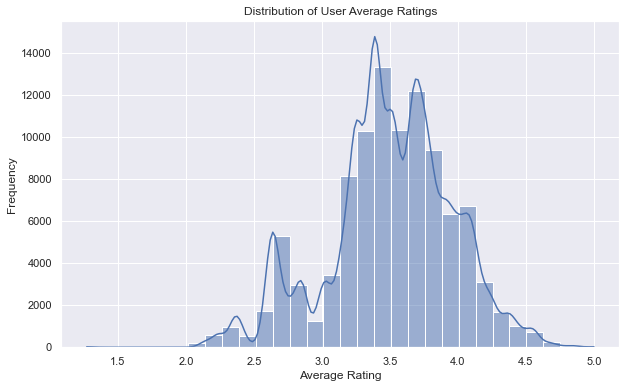

In [19]:
# 3. What is the distribution of user average ratings?
plt.figure(figsize=(10,6))
sns.histplot(data=merged_df, x='user_avg_rating', bins=30, kde=True, color=base_color)
plt.title('Distribution of User Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

The chart shows that most users have an average rating between 3 and 4, with a peak around 3.5. This suggests that users tend to give moderate ratings on average, with fewer users having very high or very low average ratings.

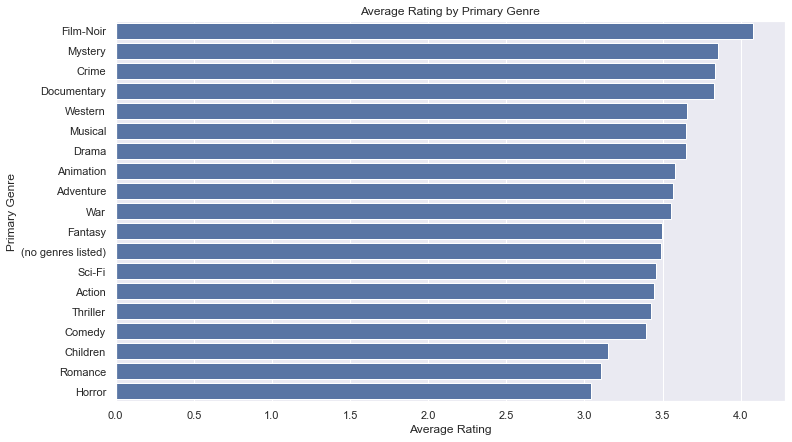

In [20]:
# 4. Do users tend to give higher ratings to movies in certain genres?
genre_ratings = merged_df.groupby('primary_genre')['rating'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='rating', y='primary_genre', data=genre_ratings, orient='h', color=base_color)
plt.xlabel('Average Rating')
plt.ylabel('Primary Genre')
plt.title('Average Rating by Primary Genre')
plt.show()

The chart shows that Film-noir, mystery, crime, and documentary genres tend to receive higher average ratings from users. This indicates that users may have a preference for these genres when it comes to rating movies.

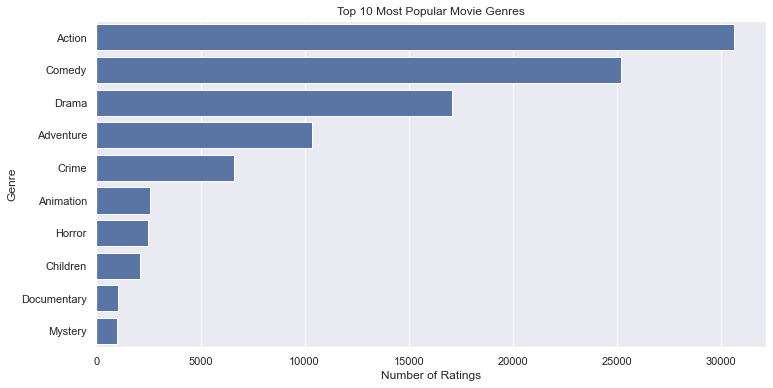

In [21]:
# 5. What are the top 10 most popular movie genres?
plt.figure(figsize=(12,6))
sns.countplot(data=merged_df, y='primary_genre', order=merged_df['primary_genre'].value_counts().index[:10], color=base_color)
plt.title('Top 10 Most Popular Movie Genres')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.show()

The chart above shows that action, drama, and comedy are the most popular movie genres among users. These genres have the highest number of ratings, indicating that they are widely watched and rated by users.

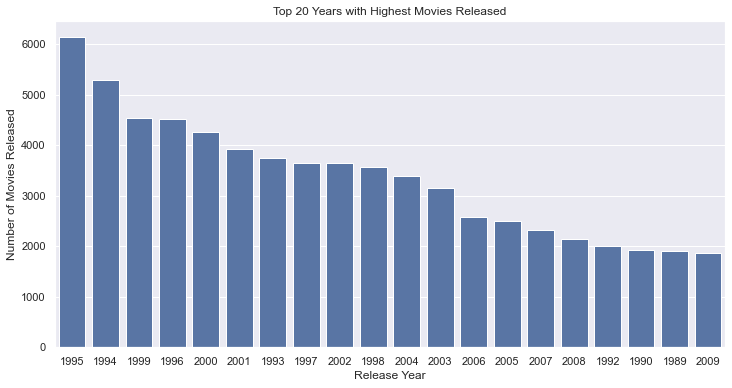

In [22]:
# 6. Which top 20 years had the highest movies released?
top_20_years = merged_df['release_year'].value_counts().head(20).reset_index()
top_20_years.columns = ['release_year', 'movie_count']
plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='movie_count', data=top_20_years, color=base_color)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.title('Top 20 Years with Highest Movies Released')
plt.show()

The chart shows that 1995 had the highest number of movies released, followed by 1994.

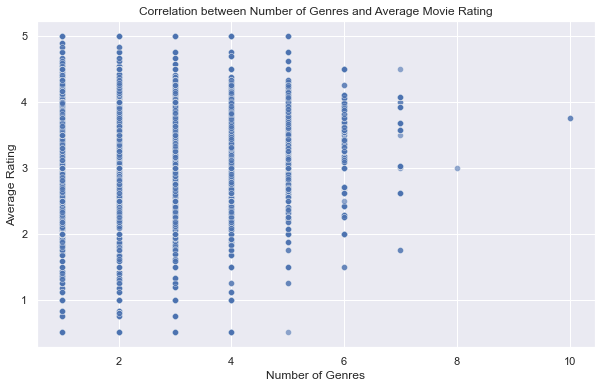

In [23]:
# 7. Is there a correlation between the number of genres and average movie rating?
plt.figure(figsize=(10,6))
sns.scatterplot(x='genre_count', y='movie_avg_rating', data=merged_df, alpha=0.6)
plt.title('Correlation between Number of Genres and Average Movie Rating')
plt.xlabel('Number of Genres')
plt.ylabel('Average Rating')
plt.show()

The chart shows a slight positive correlation between the number of genres a movie belongs to and its average rating. This suggests that movies with more genres may receive slightly higher ratings on average.

## EDA Summary

- Overall rating distribution
    - Ratings are concentrated between 3 and 4, with a peak at 4 — users tend to give moderately positive scores.

- User behavior
    - Most users have average ratings around 3–4 (peak ≈ 3.5), indicating generally moderate scoring habits.

- Genres
    - By count, the dataset is dominated by genres such as Action, Drama and Comedy (top by number of ratings).
    - By average rating, Film‑Noir, Mystery, Crime and Documentary score highest on average.
    - A slight positive correlation exists between number of genres and average movie rating.

- Popular movies
    - The most‑rated movies (top 20) include Forrest Gump, The Shawshank Redemption, Pulp Fiction, Silence of the Lambs, The Matrix, etc. — a small set of films receives disproportionately many ratings.

- Temporal / release-year patterns
    - Peak years for movies in the dataset include 1995 and 1994 (top 20 years shown). A long tail of older and less‑frequent years also exists.


In [24]:
# save the cleaned and feature-engineered dataset to a new CSV file
merged_df.to_csv('cleaned_feature_engineered_movies_ratings.csv', index=False)